# Лабораторная работа №3

## Условие

Вариант №2

Распределения:

$$\mathbf{X_1} \sim R(2, 6)$$
$$\mathbf{X_2} \sim R(2, 6)$$
$$\mathbf{X_3} \sim R(0, 8)$$
$$\mathbf{X_4} \sim N(4, 1)$$


Объёмы выборок:

$$ n_1 = 100$$
$$ n_2 = 250$$
$$ n_3 = 100$$
$$ n_4 = 100$$

## Импорты

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from time import time
from IPython.display import display, Markdown  # для вывода формул в консоль
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Определения

In [2]:
a1, b1, n1 = 2, 6, 100
a2, b2, n2 = 2, 6, 250
a3, b3, n3 = 0, 8, 100
m4, std4, n4 = 4, 1, 100

In [7]:
def mprint(*strings):
    for s in strings:
        display(Markdown(s))


np.random.seed(int(time()))
plt.rc("text", usetex=True)
plt.rc(
    "text.latex",
    preamble=r"""
\usepackage[english, russian]{babel}
\usepackage[utf8]{inputenc}
""",
)
plt.style.use("seaborn-v0_8")

In [8]:
alpha = 0.05


def verdict(alpha, p_value):
    if alpha > p_value:
        return "$H_0$ отклоняется"
    else:
        return "$H_0$ принимается"

## 1. Исходные данные

### Характеристики наблюдаемых случайных величин

| СВ             | Распределение | Параметры               | Математическое ожидание, $m_i$   | Дисперсия, $\sigma_i^2$                                  | Объём выборки, $n_i$ |
| -------------- | ------------- | ----------------------- | -------------------------------- | -------------------------------------------------------- | -------------------- |
| $\mathbf{X_1}$ | $R(2, 6)$     | $a_1 = 2, b_1 = 6$      | $m_1 = \dfrac{a_1 + b_1}{2} = 4$ | $\sigma_1^2 = \dfrac{(b_1 - a_1)^2}{12} = \dfrac{4}{3}$  | 100                  |
| $\mathbf{X_2}$ | $R(2, 6)$     | $a_2 = 2, b_2 = 6$      | $m_2 = \dfrac{a_2 + b_2}{2} = 4$ | $\sigma_2^2 = \dfrac{(b_2 - a_2)^2}{12} = \dfrac{4}{3}$  | 250                  |
| $\mathbf{X_3}$ | $R(0, 8)$     | $a_3 = 0, b_3 = 8$      | $m_3 = \dfrac{a_3 + b_3}{2} = 4$ | $\sigma_3^2 = \dfrac{(b_3 - a_3)^2}{12} = \dfrac{16}{3}$ | 100                  |
| $\mathbf{X_4}$ | $N(4, 1)$     | $m_4 = 4, \sigma_4 = 1$ | $m_4 = 4$                        | $\sigma_4^2 = 1$                                         | 100                  |


In [28]:
k = 4

X1 = np.random.uniform(a1, b1, n1)
X2 = np.random.uniform(a2, b2, n2)
X3 = np.random.uniform(a3, b3, n3)
X4 = np.random.normal(m4, std4, n4)

X = [X1, X2, X3, X4]
n = [n1, n2, n3, n4]

mprint(f"$X_1$: {X1[:10].round(2)}")
mprint(f"$X_2$: {X2[:10].round(2)}")
mprint(f"$X_3$: {X3[:10].round(2)}")
mprint(f"$X_4$: {X4[:10].round(2)}")

$X_1$: [5.84 3.14 3.55 4.82 4.37 4.18 4.25 4.81 4.53 5.46]

$X_2$: [5.04 4.04 3.21 2.67 4.17 5.05 3.07 2.93 2.43 3.48]

$X_3$: [2.55 3.59 4.31 1.13 3.19 3.92 2.19 3.82 1.18 5.14]

$X_4$: [3.27 4.13 5.69 2.68 3.37 4.63 5.41 2.83 2.75 3.91]

### Выборочные характеристики

In [ ]:
mean1 = X1.mean()
S1 = X1.var(ddof=1)
s1 = X1.std(ddof=1)

mean2 = X2.mean()
S2 = X2.var(ddof=1)
s2 = X2.std(ddof=1)

mean3 = X3.mean()
S3 = X3.var(ddof=1)
s3 = X3.std(ddof=1)

mean4 = X4.mean()
S4 = X4.var(ddof=1)
s4 = X4.std(ddof=1)

X_pooled = np.concatenate(X)
n_pooled = sum(n)

mean_pooled = X_pooled.mean()
S_pooled = X_pooled.var(ddof=1)
s_pooled = X_pooled.std(ddof=1)

mprint(f"$\\overline{{x_1}} =$ {mean1:.2f}, $s_1^2 =$ {S1:.2f}, $s_1$ = {s1:.2f}")
mprint(f"$\\overline{{x_2}} =$ {mean2:.2f}, $s_2^2 =$ {S2:.2f}, $s_2$ = {s2:.2f}")
mprint(f"$\\overline{{x_3}} =$ {mean3:.2f}, $s_3^2 =$ {S3:.2f}, $s_3$ = {s3:.2f}")
mprint(f"$\\overline{{x_4}} =$ {mean4:.2f}, $s_4^2 =$ {S4:.2f}, $s_4$ = {s4:.2f}")
mprint(
    f"$\\overline{{x_{{pooled}}}} =$ {mean_pooled:.2f}, $s_{{pooled}}^2 =$ {S_pooled:.2f}, $s_{{pooled}}$ = {s_pooled:.2f}"
)

$\overline{x_1} =$ 3.99, $s_1^2 =$ 1.23, $s_1$ = 1.11

$\overline{x_2} =$ 4.04, $s_2^2 =$ 1.37, $s_2$ = 1.17

$\overline{x_3} =$ 3.90, $s_3^2 =$ 5.22, $s_3$ = 2.28

$\overline{x_4} =$ 4.16, $s_4^2 =$ 1.02, $s_4$ = 1.01

$\overline{x_{pooled}} =$ 4.03, $s_{pooled}^2 =$ 1.97, $s_{pooled}$ = 1.41

| СВ            | Среднее, $\overline{x_i}$ | Оценка дисперсии, $s_i^2$ | Оценка с.к.о., $s_i$ |
| ------------- | ------------------------- | ------------------------- | -------------------- |
| $\mathbf{X1}$ | 3.99                      | 1.23                      | 1.11                 |
| $\mathbf{X2}$ | 4.04                      | 1.37                      | 1.17                 |
| $\mathbf{X3}$ | 3.90                      | 5.22                      | 2.28                 |
| $\mathbf{X4}$ | 4.16                      | 1.02                      | 1.01                 |
| Pooled        | 4.03                      | 1.97                      | 1.41                 |

## 2. Визуальное представление выборки

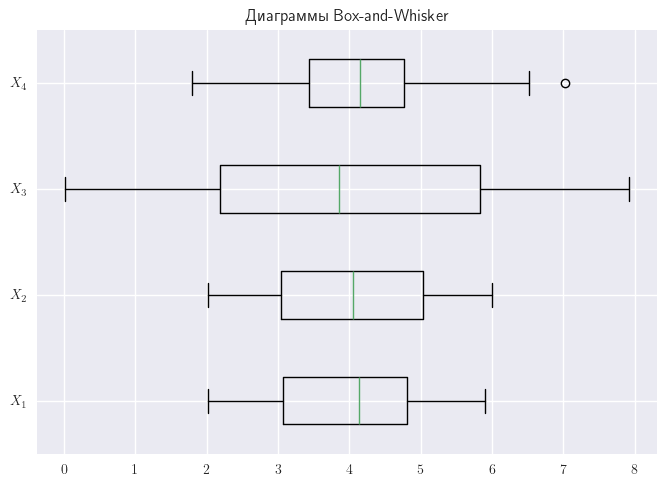

In [ ]:
plt.boxplot(
    X,
    tick_labels=[r"$X_1$", r"$X_2$", r"$X_3$", r"$X_4$"],
    vert=False,
    boxprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    flierprops=dict(markeredgecolor="black"),
)

plt.title("Диаграммы Box-and-Whisker")
plt.show()

## 3. Проверка условия применимости дисперсионного анализа

Статистическая гипотеза: $H_0: \sigma_1^2 = \sigma_2^2 = \sigma_3^2 = \sigma_4^2$

In [35]:
z, p_value = stats.bartlett(X1, X2, X3, X4)

mprint(
    r"### Bartlett’s test",
    f"$H_0: \\sigma_1^2 = \\sigma_2^2 = \\sigma_3^2 = \\sigma_4^2$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
    verdict(alpha, p_value),
)

### Bartlett’s test

$H_0: \sigma_1^2 = \sigma_2^2 = \sigma_3^2 = \sigma_4^2$

$z_{выб} =$ 107.99

$p =$ 0.00

$H_0$ отклоняется

Критерий Бартлетта:
| Выборочное значение статистики критерия | p-value | Статистическое решение при $\alpha = 0.05$ | Ошибка статистического решения |
| --------------------------------------- | ------- | ------------------------------------------ | ------------------------------ |
| 107.99                                  | 0.00    | $H_0$ отклоняется                          | Нет                            |

## 4. Однофакторный дисперсионный анализ

In [47]:
S_general = X_pooled.var()
S_inside = 1 / n_pooled * sum([n[i] * X[i].var() for i in range(k)])
S_between = S_general - S_inside

S_general_unbiased = S_general * n_pooled / (n_pooled - 1)
S_inside_unbiased = S_inside * n_pooled / (n_pooled - k)
S_between_unbiased = S_between * n_pooled / (k - 1)

mprint(
    f"$\\tilde{{D}}_{{\\text{{межгр}}}} = {S_between:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{внутр}}}} = {S_inside:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{общ}}}} = {S_general:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{межгр, несмещ}}}} = {S_between_unbiased:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{внутр, несмещ}}}} = {S_inside_unbiased:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{общ, несмещ}}}} = {S_general_unbiased:.2f}$",
)

$\tilde{D}_{\text{межгр}} = 0.01$

$\tilde{D}_{\text{внутр}} = 1.96$

$\tilde{D}_{\text{общ}} = 1.97$

$\tilde{D}_{\text{межгр, несмещ}} = 1.19$

$\tilde{D}_{\text{внутр, несмещ}} = 1.98$

$\tilde{D}_{\text{общ, несмещ}} = 1.97$

Таблица дисперсионного анализа:

| Источник вариации      | Показатель вариации               | Число степеней свободы | Несмещённая оценка                                |
| ---------------------- | --------------------------------- | ---------------------- | ------------------------------------------------- |
| Группировочный признак | $\tilde{D}_{\text{межгр}} = 0.01$ | $k - 1 = 3$            | $\dfrac{n}{k - 1}\tilde{D}_{\text{межгр}} = 1.19$ |
| Остаточные факторы     | $\tilde{D}_{\text{внутр}} = 1.96$ | $n - k = 546$          | $\dfrac{n}{n - k}\tilde{D}_{\text{внутр}} = 1.98$ |
| Все факторы            | $\tilde{D}_{\text{общ}} = 1.97$   | $n - 1 = 549$          | $\dfrac{n}{n - 1}\tilde{D}_{\text{общ}} = 1.97$   |

In [49]:
eta_squared = S_between / S_general

eta = sqrt(eta_squared)

mprint(
    f"$\\tilde{{\\eta^2}} = {eta_squared:.2f}$",
    f"$\\tilde{{\\eta}} = {eta:.2f}$",
)

$\tilde{\eta^2} = 0.00$

$\tilde{\eta} = 0.06$

Эмпирирический коэффициент детерминации $\tilde{\eta^2} = \dfrac{\tilde{D}_{\text{межгр}}}{\tilde{D}_{\text{общ}}} = 0.00$

Эмпирическое корреляционное отношение $\tilde{\eta} = \sqrt{\tilde{\eta^2}} = 0.06$

Статистическая гипотеза: $H_0: m_1 = m_2 = m_3 = m_4$

In [56]:
# можно использовать функцию f_oneway, но критерий простой и я напишу его сам

z = S_between_unbiased / S_inside_unbiased
p_value = stats.f.sf(z, k - 1, n_pooled - k)

mprint(
    r"### ANOVA",
    f"$H_0: m_1 = m_2 = m_3 = m_4$",
    f"$z_{{выб}} = {z:.2f}$",
    f"$p = {p_value:.2f}$",
    verdict(alpha, p_value),
)

### ANOVA

$H_0: m_1 = m_2 = m_3 = m_4$

$z_{выб} = 0.60$

$p = 0.61$

$H_0$ принимается

| Выборочное значение статистики критерия | p-value | Статистическое решение при $\alpha = 0.05$ | Ошибка статистического решения |
| --------------------------------------- | ------- | ------------------------------------------ | ------------------------------ |
| 0.60                                    | 0.61    | $H_0$ принимается                          | Нет                            |

## Метод линейных контрастов

### Доверительные интервалы для $m_1, \dots, m_k$

In [66]:
intervals = pd.DataFrame(index=["Нижняя граница", "Верхняя граница"])
for data, N, i in zip(X, n, range(1, k + 1)):
    std_err = stats.sem(data)
    intervals[f"$X_{i}$"] = stats.t.interval(
        1 - alpha, df=N - 1, loc=np.mean(data), scale=std_err
    )

intervals

,$X_1$,$X_2$,$X_3$,$X_4$
Нижняя граница,3.767396,3.898235,3.448962,3.960250
Верхняя граница,4.206900,4.189947,4.355526,4.360814


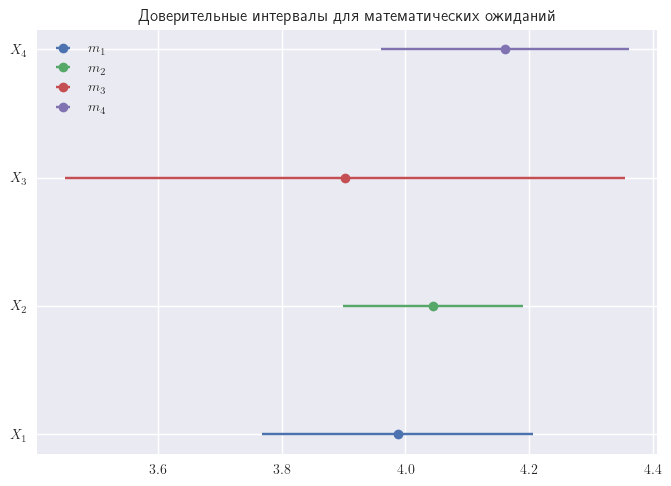

In [79]:
for interval, y in zip(intervals.columns, range(1, k + 1)):
    plt.errorbar(
        intervals[interval].mean(),
        y,
        xerr=(intervals[interval].mean() - intervals[interval].iloc[0]),
        fmt="o",
        label=f"$m_{y}$",
    )

plt.yticks(range(1, k + 1), [f"$X_{i}$" for i in range(1, k + 1)])
plt.legend(loc="upper left")
plt.title("Доверительные интервалы для математических ожиданий")
plt.show()

### Попарные сравнения $m_i$ и $m_j$

In [81]:
grouped = pd.DataFrame({"data": X_pooled, "group": np.repeat(range(1, k + 1), n)})
grouped

,data,group
0,5.840166,1
1,3.135305,1
2,3.553138,1
3,4.822591,1
4,4.365829,1
...,...,...
545,3.758334,4
546,3.835082,4
547,4.485864,4
548,4.625658,4


In [84]:
result = pairwise_tukeyhsd(endog=grouped["data"], groups=grouped["group"], alpha=alpha)
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.0569 0.9862  -0.372 0.4858  False
     1      3  -0.0849 0.9739 -0.5975 0.4277  False
     1      4   0.1734 0.8196 -0.3392  0.686  False
     2      3  -0.1418 0.8293 -0.5707 0.2871  False
     2      4   0.1164 0.8972 -0.3125 0.5453  False
     3      4   0.2583 0.5643 -0.2543 0.7709  False
---------------------------------------------------


In [96]:
df = pd.DataFrame(
    data=result._results_table.data[1:],
    columns=[
        "m_i",
        "m_j",
        "z",
        "p-value",
        "lower",
        "upper",
        "Отклонение H_0",
    ],
)

df

,m_i,m_j,z,p-value,lower,upper,Отклонение H_0
0,1,2,0.0569,0.9862,-0.3720,0.4858,False
1,1,3,-0.0849,0.9739,-0.5975,0.4277,False
2,1,4,0.1734,0.8196,-0.3392,0.6860,False
3,2,3,-0.1418,0.8293,-0.5707,0.2871,False
4,2,4,0.1164,0.8972,-0.3125,0.5453,False
5,3,4,0.2583,0.5643,-0.2543,0.7709,False


| Гипотеза          | Выборочное значение статистики критерия | $p$-value | Статистическое решение при $\alpha = 0.05$ | Ошибка статистического решения |
| ----------------- | --------------------------------------- | --------- | ------------------------------------------ | ------------------------------ |
| $H_0:\ m_1 = m_2$ | 0.06                                    | 0.99      | $H_0$ принимается                          | Нет                            |
| $H_0:\ m_1 = m_3$ | -0.08                                   | 0.97      | $H_0$ принимается                          | Нет                            |
| $H_0:\ m_1 = m_4$ | 0.17                                    | 0.82      | $H_0$ принимается                          | Нет                            |
| $H_0:\ m_2 = m_3$ | -0.14                                   | 0.83      | $H_0$ принимается                          | Нет                            |
| $H_0:\ m_2 = m_4$ | 0.12                                    | 0.90      | $H_0$ принимается                          | Нет                            |
| $H_0:\ m_3 = m_4$ | 0.26                                    | 0.56      | $H_0$ принимается                          | Нет                            |
